# Exercise 1: PCA vs. Kernel PCA on Non-linear Data

## Objective
Compare linear Principal Component Analysis (PCA) with Kernel PCA on a non-linear dataset, focusing on how each method captures and reconstructs the data's structure.

## Dataset
We'll use the synthetic "moons" dataset from sklearn.datasets.

## Tasks

1. Data Generation:
   - Generate the "moons" dataset using sklearn.datasets.make_moons.
   - Add Gaussian noise to the dataset.

2. Implement PCA:
   - Apply standard PCA to reduce the dataset to 1 dimension.
   - Use the inverse_transform method to project the data back to 2 dimensions.
   - Visualize the original 2D data and the PCA reconstruction.

3. Implement Kernel PCA:
   - Apply Kernel PCA with a radial basis function (RBF) kernel to reduce the dataset to 1 dimension.
   - Use the inverse_transform method to project the data back to 2 dimensions.
   - Visualize the original 2D data and the Kernel PCA reconstruction.

4. Classification Task:
   - Split the data into training and testing sets.
   - Train a simple classifier (e.g., Logistic Regression) on:
     a) The original 2D data
     b) The 2D PCA reconstruction
     c) The 2D Kernel PCA reconstruction
   - Compare the classification accuracies.

5. Parameter Exploration (Optional):
   - Experiment with different noise levels in the dataset.
   - Try different kernels for Kernel PCA (e.g., polynomial, sigmoid).


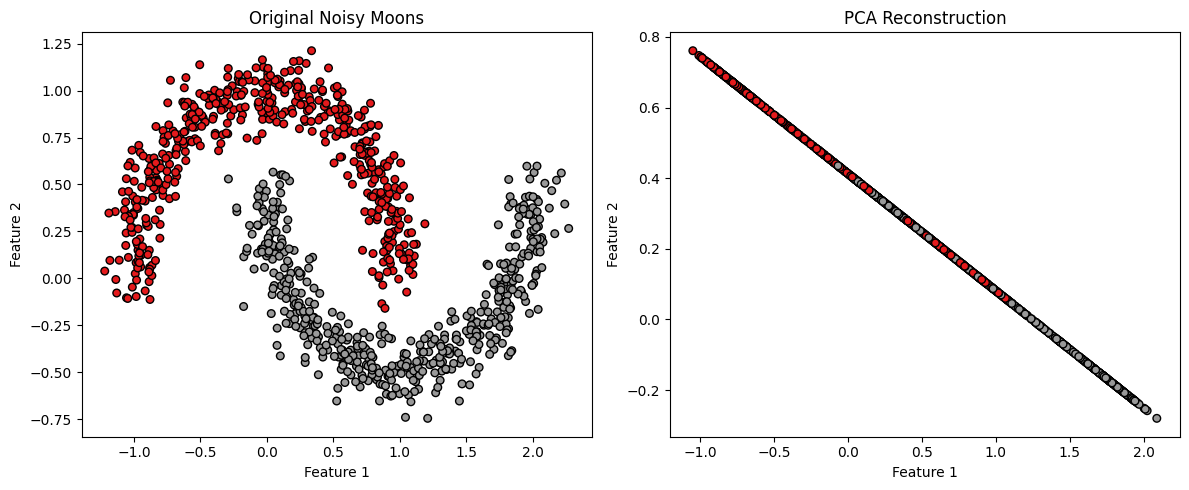

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to generate noisy moons dataset
def generate_noisy_moons(n_samples=1000, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y

# Generate data
X, y = generate_noisy_moons(n_samples=1000, noise=0.1)

# Apply PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
 # Reconstruct the data back into original space
X_reconstructed = pca.inverse_transform(X_pca)

# Plot original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=30)
plt.title("Original Noisy Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot PCA reconstruction
plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=30)
plt.title("PCA Reconstruction")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()



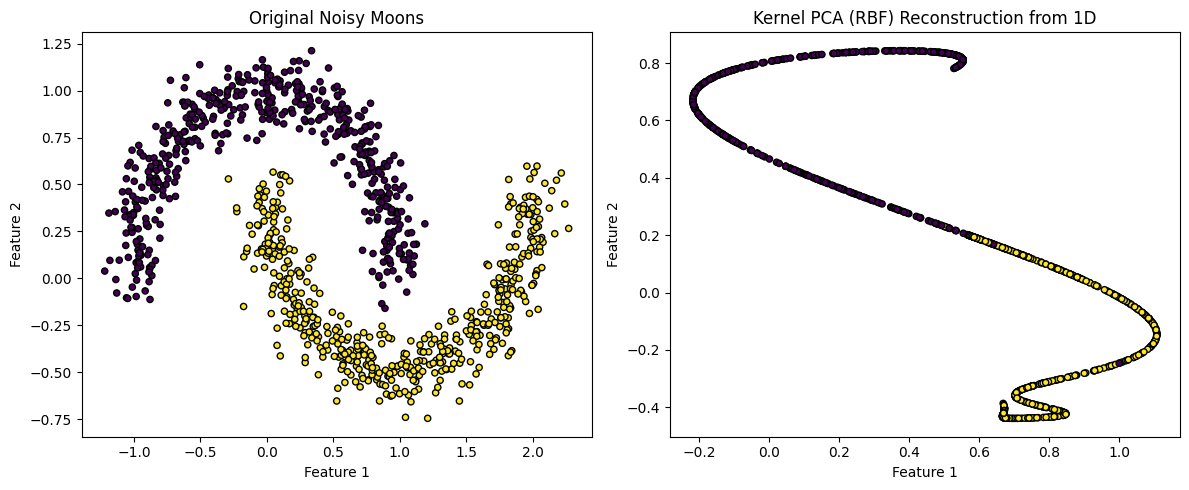

Reconstruction RMSE (RBF kPCA 1D): 0.5593


In [15]:

# Apply Kernel PCA
# Kernel PCA to 1D with RBF kernel
# tip: gamma controls the RBF width. Larger gamma -> tighter local structure.
kpca = KernelPCA(
    n_components=1,
    kernel="rbf",
    gamma=20,                # how flexible it can be. try values like 1, 5, 10, 20 to see differences
    fit_inverse_transform=True, # enables inverse_transform (pre-image approximation)
    #alpha=1e-3,                 # ridge parameter for the inverse mapping
    #random_state=42
)
X_kpca_1d = kpca.fit_transform(X)

# 3) Reconstruct back to 2D (pre-image)
X_recon = kpca.inverse_transform(X_kpca_1d)

# 4) Visualize original vs reconstruction
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
plt.title("Original Noisy Moons")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")

# Kernel PCA reconstruction (from 1D)
plt.subplot(1, 2, 2)
plt.scatter(X_recon[:, 0], X_recon[:, 1], c=y, s=20, edgecolor="k")
plt.title("Kernel PCA (RBF) Reconstruction from 1D")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Optional: check reconstruction error (RMSE)
import numpy as np
rmse = np.sqrt(np.mean((X - X_recon)**2))
print(f"Reconstruction RMSE (RBF kPCA 1D): {rmse:.4f}")



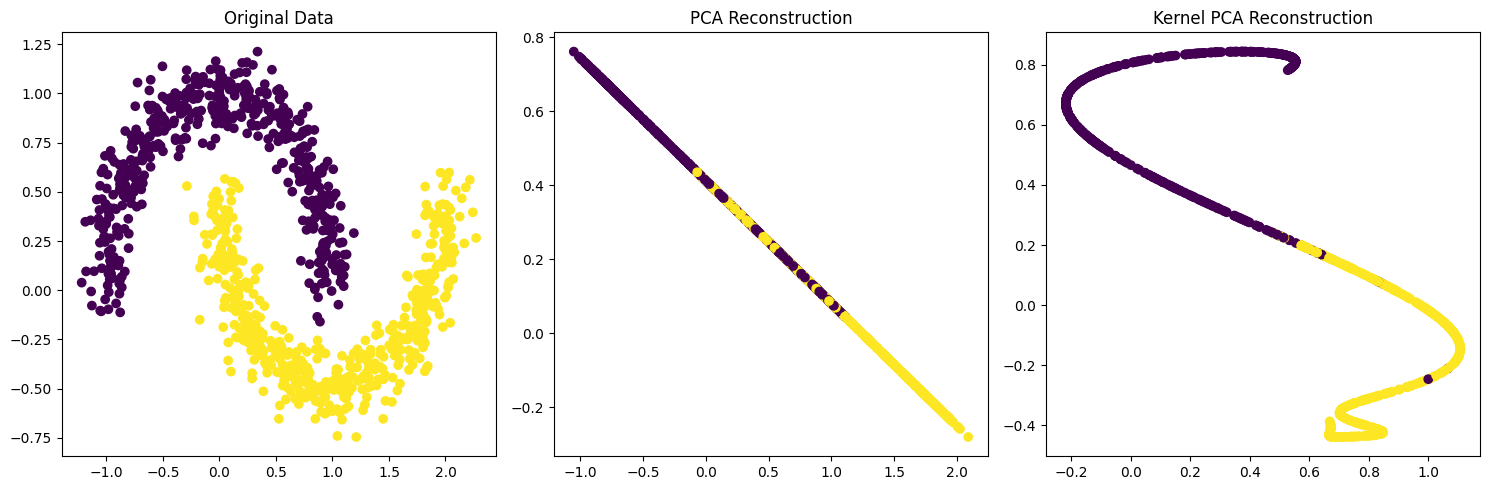

In [16]:

# Visualize the data and reconstructions
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data')

# PCA reconstruction
plt.subplot(132)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap='viridis')
plt.title('PCA Reconstruction')

# Kernel PCA reconstruction
plt.subplot(133)
plt.scatter(X_recon[:, 0], X_recon[:, 1], c=y, cmap='viridis')
plt.title('Kernel PCA Reconstruction')

plt.tight_layout()
plt.show()


In [ ]:

# Classification task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original data
clf_original = LogisticRegression(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# PCA
# RUN PCA HERE AND CALCULATE ACCURACY

# Kernel PCA
# RUN Kernel PCA HERE AND CALCULATE ACCURACY

print(f"Accuracy on original data: {acc_original:.4f}")
print(f"Accuracy with PCA reconstruction: {acc_pca:.4f}")
print(f"Accuracy with Kernel PCA reconstruction: {acc_kpca:.4f}")


In [ ]:


# Classification task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original data
clf_original = LogisticRegression(random_state=42, max_iter=1000)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# ===== PCA =====
# Reduce to 1D (or 2D), then reconstruct back to original space and classify on reconstruction
pca = PCA(n_components=1, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

# Project back (inverse_transform) to 2D
X_train_pca_recon = pca.inverse_transform(X_train_pca)
X_test_pca_recon  = pca.inverse_transform(X_test_pca)

clf_pca = LogisticRegression(random_state=42, max_iter=1000)
clf_pca.fit(X_train_pca_recon, y_train)
y_pred_pca = clf_pca.predict(X_test_pca_recon)
acc_pca = accuracy_score(y_test, y_pred_pca)

# ===== Kernel PCA (RBF) =====
# Reduce to 1D with RBF kernel; enable inverse mapping
kpca = KernelPCA(n_components=1, kernel="rbf", gamma=10.0,
                 fit_inverse_transform=True, alpha=1e-3, random_state=42)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca  = kpca.transform(X_test)

# Reconstruct back to original space
X_train_kpca_recon = kpca.inverse_transform(X_train_kpca)
X_test_kpca_recon  = kpca.inverse_transform(X_test_kpca)

clf_kpca = LogisticRegression(random_state=42, max_iter=1000)
clf_kpca.fit(X_train_kpca_recon, y_train)
y_pred_kpca = clf_kpca.predict(X_test_kpca_recon)
acc_kpca = accuracy_score(y_test, y_pred_kpca)

print(f"Accuracy on original data: {acc_original:.4f}")
print(f"Accuracy with PCA reconstruction: {acc_pca:.4f}")
print(f"Accuracy with Kernel PCA reconstruction: {acc_kpca:.4f}")

Accuracy on original data: 0.8800
Accuracy with PCA reconstruction: 0.6800
Accuracy with Kernel PCA reconstruction: 0.9300


In [ ]:
pip install umap-learn



SyntaxError: invalid syntax (4120544159.py, line 1)

# Exercise 2: Comparison of Manifold Learning Techniques

## Objective
Compare different manifold learning techniques on a synthetic dataset to understand their strengths and weaknesses in capturing non-linear structures and reducing dimensionality.

## Dataset
We'll use the "S-curve" dataset, which can be generated using sklearn.datasets.make_s_curve.

## Tasks

1. Data Generation:
   - Examine the data generation code, and understand what it is doing

2. Implement and Visualize Different Manifold Learning Techniques:
   Apply the following techniques to reduce the 3D S-curve to 2D:
   a) PCA (as a baseline linear method)
   b) Isomap
   c) Locally Linear Embedding (LLE)
   d) t-SNE
   e) UMAP
   Visualize the results of each method.

3. Quantitative Comparison:
   - Implement a function to calculate the trustworthiness (from sklearn.manifold) of each embedding.
   - Compare the trustworthiness scores for each method.

4. Computational Efficiency:
   - Measure and compare the execution time of each method.

5. Parameter Exploration:
   - For one of the methods (e.g., t-SNE or UMAP), explore how changing a key parameter affects the result.


In [ ]:
pip install "numpy<=2.2" --upgrade --force-reinstall



SyntaxError: invalid syntax (2557639610.py, line 1)

In [27]:
pip install "numba==0.60.0" "numpy<=2.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 59.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 47.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: llvmlite━━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: llvmlite 0.44.0 0/3 [numpy]
    Uninstalling llvmlite-0.44.0:━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled llvmlite-0.44.00m 0/3 [numpy]
  Attempting uninstall: numbam╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [llvmlite]
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from sklearn.manifold import trustworthiness
import umap
import time


def make_double_s_curve(n_samples=1000, noise=0.1, random_state=None):
    """Generate a dataset with two intertwined S-curves"""
    X1, _ = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)
    X2, _ = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state+1)
    
    # Rotate the second S-curve by swapping axes
    X2 = X2[:, [1, 2, 0]]
    
    # Combine the two S-curves
    X = X1 * X2
    
    return X

def create_rgb_colors(X):
    """Create RGB colors based on the 3D coordinates"""
    # Normalize X to [0, 1] range
    X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    
    # Scale to [0.2, 0.7] range
    X_color = X_norm * 0.5 + 0.2
    
    return X_color

# Generate the dataset
n_points = 1000
X = make_double_s_curve(n_samples=n_points, noise=0.05, random_state=42)

# Create RGB colors
colors = create_rgb_colors(X)


# Add some noise
noise = np.random.normal(scale=0.1, size=X.shape)
X_noisy = X + noise

# Function to plot the results
def plot_embedding(ax, X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    ax.scatter(X[:, 0], X[:, 1], c=colors)
    ax.set_title(title)

# List of manifold learning methods
methods = [
    # TODO: Fill out the code here
]

# TODO: Apply each method and measure time
# Hint - create a method that iterates over the "methods" array above
results = []
times = []
trustworthiness_scores = []



fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Plot original data
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X_noisy[:, 0], X_noisy[:, 1], X_noisy[:, 2], c=colors)
ax.set_title("Original S-curve")

# Create trustworthiness scores

plt.tight_layout()
plt.show()

# Print results
print("Method\t\tTime (s)\tTrustworthiness")
print("-" * 50)
for (name, _), t, trust in zip(methods, times, trustworthiness_scores):
    print(f"{name:<10}\t{t:.2f}\t\t{trust:.4f}")

# Parameter exploration for t-SNE
perplexities = [5, 30, 50, 100]
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()

# And in the t-SNE parameter exploration:
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, init='pca', random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_noisy)
    ax = axs[i]
    plot_embedding(ax,X_tsne, f"t-SNE (perplexity={perplexity})")  # Pass color here

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (1047108990.py, line 10)

# Exercise 5: Feature Selection vs. Dimensionality Reduction

## Objective
Compare feature selection methods with dimensionality reduction techniques, understanding their differences, strengths, and weaknesses in the context of a real-world dataset.

## Dataset
We'll use the Wine Quality dataset from the UCI Machine Learning Repository. This dataset contains various chemical properties of wines and their quality ratings.

## Background

### Dimensionality Reduction Techniques:

1. Principal Component Analysis (PCA):
   - PCA transforms the original features into a new set of uncorrelated features (principal components).
   - These components are ordered by the amount of variance they explain in the data.
   - PCA is useful for reducing dimensionality while retaining as much variance as possible.

2. Uniform Manifold Approximation and Projection (UMAP):
   - UMAP is a non-linear dimensionality reduction technique.
   - It tries to preserve both local and global structure of the data in the lower-dimensional space.
   - UMAP is particularly good for visualization and can often capture more complex relationships than PCA.

### Feature Selection Methods:

1. Recursive Feature Elimination (RFE):
   - RFE recursively removes features, building a model (e.g., Random Forest) each time.
   - It ranks features by importance, recursively eliminating the least important features.
   - RFE helps select a subset of the original features that are most relevant to the target variable.

2. Lasso (Least Absolute Shrinkage and Selection Operator):
   - Lasso is a linear regression method that includes L1 regularization.
   - It tends to produce sparse models by shrinking some coefficients to exactly zero.
   - Features with non-zero coefficients are considered selected.
   - Lasso is useful for feature selection in linear models and can handle multicollinearity.

## Tasks

1. Data Loading and Preprocessing:
   - Load the Wine Quality dataset.
   - Perform basic preprocessing (handling missing values if any, scaling features).
   - Split the data into features (X) and target variable (y).

2. Implement PCA:
   - Apply PCA to reduce the dimensionality of the dataset.
   - Determine the number of components needed to explain 95% of the variance.

3. Implement UMAP:
   - Apply UMAP to reduce the dimensionality of the dataset to 2 components.
   - Visualize the UMAP embedding, coloring points by wine quality.

4. Feature Selection Methods:
   - Implement Recursive Feature Elimination (RFE) with Random Forest as the estimator.
   - Implement Lasso for feature selection.

5. Model Training and Evaluation:
   - Use a Random Forest Classifier for this task.
   - Train and evaluate the model using:
     a) All original features
     b) PCA-reduced features
     c) UMAP-reduced features
     d) RFE-selected features
     e) Lasso-selected features
   - Compare the performance (accuracy and training time) of each method.

6. Feature Importance Analysis:
   - For RFE and Lasso, identify the top selected features.
   - For the original Random Forest model, plot feature importances.
   - Compare the selected/important features across methods.

7. Analysis:
   - Discuss the trade-offs between feature selection and dimensionality reduction.
   - Analyze how each method affects model performance and interpretability.
   - Consider scenarios where each approach (feature selection vs. dimensionality reduction) might be more appropriate.

## Hints
- Use pandas for data loading and preprocessing.
- sklearn provides implementations for PCA, RFE, Lasso, and Random Forest.
- Use umap-learn library for UMAP.
- matplotlib and seaborn will be useful for visualizations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import umap
import time

# Load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Preprocessing
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
# TODO: Run PCA to get t .95 variance


# UMAP
# TODO: Run Umap with 2 components


# Visualize UMAP
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter)
plt.title('UMAP projection of Wine Quality Data')
plt.show()

# RFE
# TODO Use RFE with RandomForestClassifier

# Lasso
# TODO Use Lasso; select columns with coeff > 0


# Model training and evaluation
def train_and_evaluate(X_train, X_test, y_train, y_test, method_name):
    #TODO: Run a random forest classifer
    # Should just print time and accuracy
    # Can return accuracy if you want.

results = {}
results['Original'] = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test, "Original")
results['PCA'] = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test, "PCA")
results['UMAP'] = train_and_evaluate(X_train_umap, X_test_umap, y_train, y_test, "UMAP")
results['RFE'] = train_and_evaluate(X_train_rfe, X_test_rfe, y_train, y_test, "RFE")
results['Lasso'] = train_and_evaluate(X_train_lasso, X_test_lasso, y_train, y_test, "Lasso")

# Feature importance analysis
rf_original = results['Original'][0]
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_original.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

print("\nTop features selected by RFE:")
print(X.columns[rfe.support_])

print("\nFeatures selected by Lasso:")
print(lasso_selected_features)

print("\nAnalysis:")
print("1. Dimensionality reduction (PCA, UMAP) transforms the original features into a new space.")
print("2. Feature selection (RFE, Lasso) chooses a subset of the original features.")
print("3. Compare the accuracy and training time for each method.")
print("4. Notice how feature selection methods provide more interpretable results.")
print("5. Consider the trade-off between model performance, training time, and interpretability.")